In [1]:
import pandas as pd
df = pd.read_csv('last.csv')

In [2]:
df

,CustomerID,Annual Income,Spending Score
0,1,15,39
1,2,16,81
2,3,17,6
3,4,18,77
4,5,19,40
5,6,20,76
6,7,21,6
7,8,22,94
8,9,23,3
9,10,24,72


In [3]:
df.head(5)

,CustomerID,Annual Income,Spending Score
0,1,15,39
1,2,16,81
2,3,17,6
3,4,18,77
4,5,19,40


In [5]:
x = df.iloc[:,[1,2]].values
x

array([[15, 39],
       [16, 81],
       [17,  6],
       [18, 77],
       [19, 40],
       [20, 76],
       [21,  6],
       [22, 94],
       [23,  3],
       [24, 72]])

In [7]:
x = df[['Annual Income','Spending Score']].values
x

array([[15, 39],
       [16, 81],
       [17,  6],
       [18, 77],
       [19, 40],
       [20, 76],
       [21,  6],
       [22, 94],
       [23,  3],
       [24, 72]])

In [8]:
from sklearn.cluster import KMeans

sse=[]
for k in range(1,10):
    km = KMeans(n_clusters = k , init='k-means++')
    km.fit(x)
    sse.append(km.inertia_)

In [9]:
sse

[11166.9,
 1800.8,
 359.16666666666663,
 109.16666666666666,
 59.166666666666664,
 41.0,
 27.166666666666664,
 9.0,
 2.5]

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


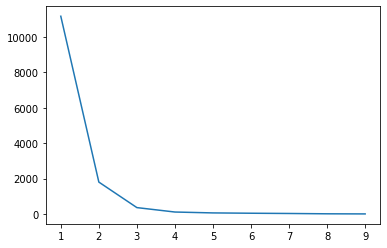

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),sse)

In [13]:
km = KMeans(n_clusters = 5 ,init='k-means++',random_state=42)
y_p = km.fit_predict(x)
y_p

array([2, 0, 1, 0, 2, 0, 1, 3, 1, 4], dtype=int32)

In [14]:
km.labels_

array([2, 0, 1, 0, 2, 0, 1, 3, 1, 4], dtype=int32)

In [15]:
df['target']=km.labels_

In [16]:
df1 = df[df['target'] == 0]
df2 = df[df['target'] == 1]
df3 = df[df['target'] == 2]
df4 = df[df['target'] == 3]
df5 = df[df['target'] == 4]

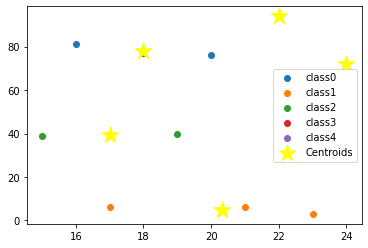

In [19]:
plt.scatter(x=df1['Annual Income'] , y = df1['Spending Score'] , label = 'class0')
plt.scatter(x=df2['Annual Income'] , y = df2['Spending Score'] , label = 'class1')
plt.scatter(x=df3['Annual Income'] , y = df3['Spending Score'] , label = 'class2')
plt.scatter(x=df4['Annual Income'] , y = df4['Spending Score'] , label = 'class3')
plt.scatter(x=df5['Annual Income'] , y = df5['Spending Score'] , label = 'class4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='*')
plt.legend()